In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import GridSearchCV


import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN 
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import os
import warnings
warnings.filterwarnings('ignore')

## chargement du dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,ClientID,Genre,Age,salaire,fidelite_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploration

In [3]:
dataset.isna().sum()

ClientID          0
Genre             0
Age               0
salaire           0
fidelite_1_100    0
dtype: int64

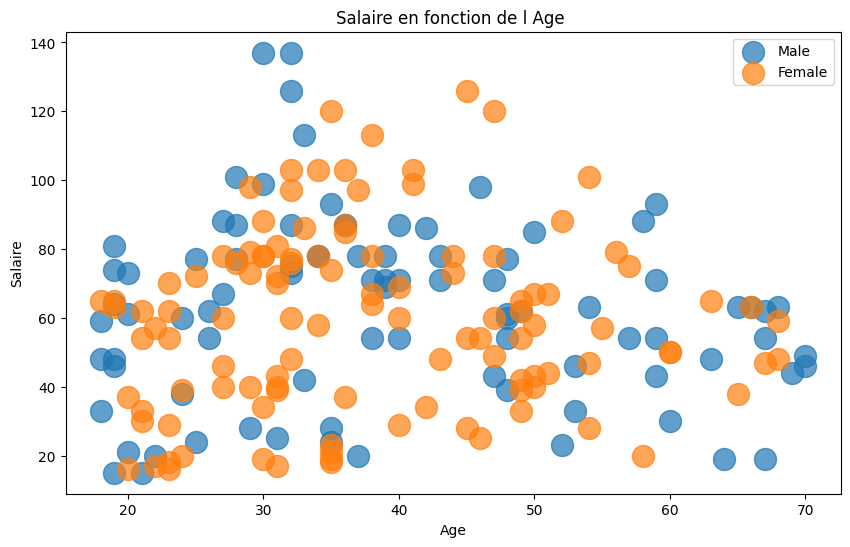

In [4]:
plt.figure(1 , figsize = (10 , 6))
for genre in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'salaire' , data = dataset[dataset['Genre'] == genre] ,
                s = 250 , alpha = 0.7 , label = genre)
plt.xlabel('Age'), plt.ylabel('Salaire') 
plt.title('Salaire en fonction de l Age ')
plt.legend()
plt.show()

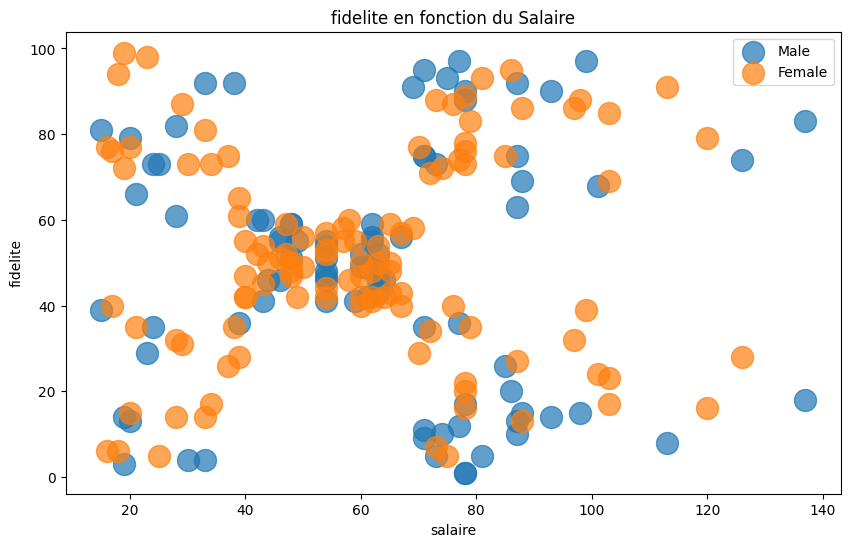

In [5]:
plt.figure(1 , figsize = (10 , 6))
for genre in ['Male' , 'Female']:
    plt.scatter(x = 'salaire' , y = 'fidelite_1_100' , data = dataset[dataset['Genre'] == genre] ,
                s = 250 , alpha = 0.7 , label = genre)
plt.xlabel('salaire'), plt.ylabel('fidelite') 
plt.title('fidelite en fonction du Salaire')
plt.legend()
plt.show()

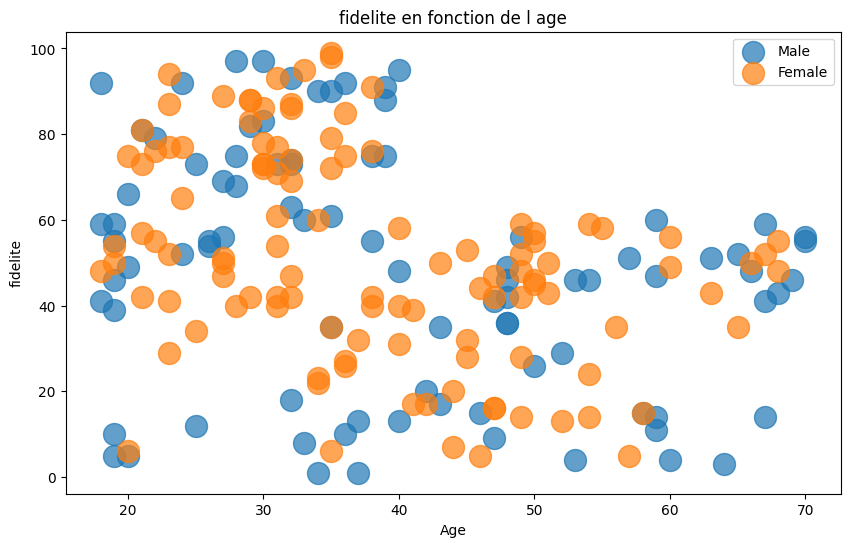

In [6]:
plt.figure(1 , figsize = (10 , 6))
for genre in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'fidelite_1_100' , data = dataset[dataset['Genre'] == genre] ,
                s = 250 , alpha = 0.7 , label = genre)
plt.xlabel('Age'), plt.ylabel('fidelite') 
plt.title('fidelite en fonction de l age')
plt.legend()
plt.show()

In [7]:
# px.scatter(data_frame = dataset, x = 'salaire', y = 'fidelite_1_100',
#           title = 'Salaire annuel (x1000) - fidelite_1_100', )

In [8]:
fig = px.pie(dataset, names='Genre')
fig.show()

In [9]:
# plt.figure(figsize = (14, 9))
# plotnumber = 1

# for col in ['Age', 'salaire', 'fidelite_1_100']:
#     if plotnumber <= 3:
#         ax = plt.subplot(1, 3, plotnumber)
#         sns.distplot(dataset[col])
        
#     plotnumber += 1
    
# plt.tight_layout()
# plt.show()

In [10]:
# plt.figure(figsize = (14, 9))
# plotnumber = 1

# for col in ['Age', 'salaire', 'fidelite_1_100']:
#     if plotnumber <= 3:
#         ax = plt.subplot(1, 3, plotnumber)
#         sns.distplot(dataset[col])
        
#     plotnumber += 1
    
# plt.tight_layout()
# plt.show()

# PreTraitement

In [11]:
colonne_encoder = make_column_transformer( 
    (OneHotEncoder(handle_unknown = "ignore"), ['Genre'])
    ) 


In [12]:
genre = colonne_encoder.fit_transform(dataset)
genre = genre.T

In [13]:
# genre

In [14]:
dataset['Genre_f'] = genre[0]
dataset['Genre_m'] = genre[1]

In [15]:
dataset

,ClientID,Genre,Age,salaire,fidelite_1_100,Genre_f,Genre_m
0,1,Male,19,15,39,0.0,1.0
1,2,Male,21,15,81,0.0,1.0
2,3,Female,20,16,6,1.0,0.0
3,4,Female,23,16,77,1.0,0.0
4,5,Female,31,17,40,1.0,0.0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1.0,0.0
196,197,Female,45,126,28,1.0,0.0
197,198,Male,32,126,74,0.0,1.0
198,199,Male,32,137,18,0.0,1.0


# K-MEANS

###  Determination de K par la methode Elbow

On utilise le point de retournement de la courbe de la somme des variances pour choisir le bon nombre de clusters.

In [16]:
# dataset

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

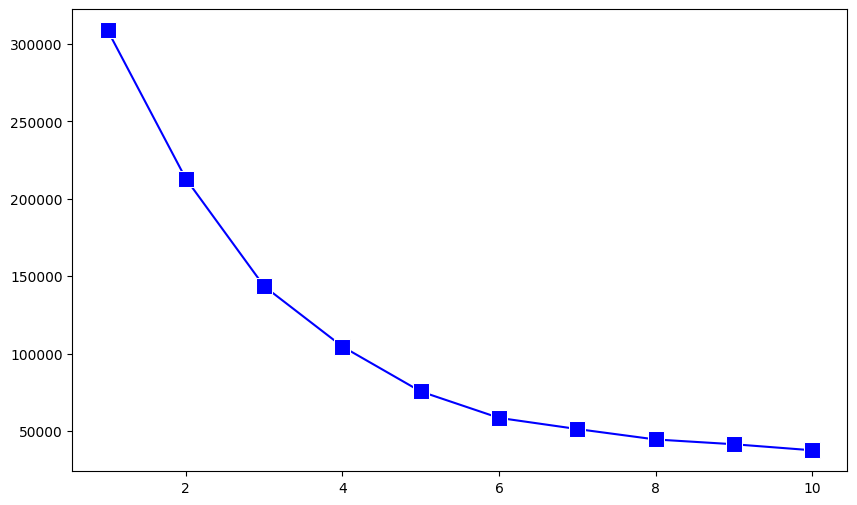

In [18]:
X = dataset.drop(['Genre','ClientID'], axis=1)
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax,markersize=12,marker='s',color = 'b')
ax.set_xlabel('K')
ax.set_ylabel('Inertia')
#plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')

In [ ]:
# from sklearn.pipeline import Pipeline

# params = {
#             'kmt__n_clusters': [i for i in range(1,11)]  # two underscores
#             }

# grid_kmt = GridSearchCV(param_grid=params, estimator=KMeans(init = 'k-means++', random_state = 0), cv = 3)
# grid_kmt.get_params()

In [ ]:
# grid_kmt.fit(X)

In [19]:
k = 5
clusters = KMeans(n_clusters = k)
clusters.fit(X)
y_clusters = clusters.fit_predict(X)   

In [ ]:
# X

In [ ]:
# dataset.head()

In [20]:
X['Labels'] = clusters.labels_

In [ ]:
# X.head(10)

In [21]:
plt.figure(figsize=(12, 7))
sns.scatterplot(X['salaire'], X['fidelite_1_100'], hue=X['Labels'], 
                palette=sns.color_palette('bright', 5))
plt.title('Clustering avec K-Means  (5 classe)')
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 1200x700 with 0 Axes>

In [ ]:
# y_clusters = model.fit_predict(x)
# y_clusters
x = X[['Age','salaire','fidelite_1_100']].values
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age -->')
ax.set_ylabel('Salaire -->')
ax.set_zlabel('<--- fidelite')
ax.view_init(10, azim=360)
ax.legend()
plt.show()

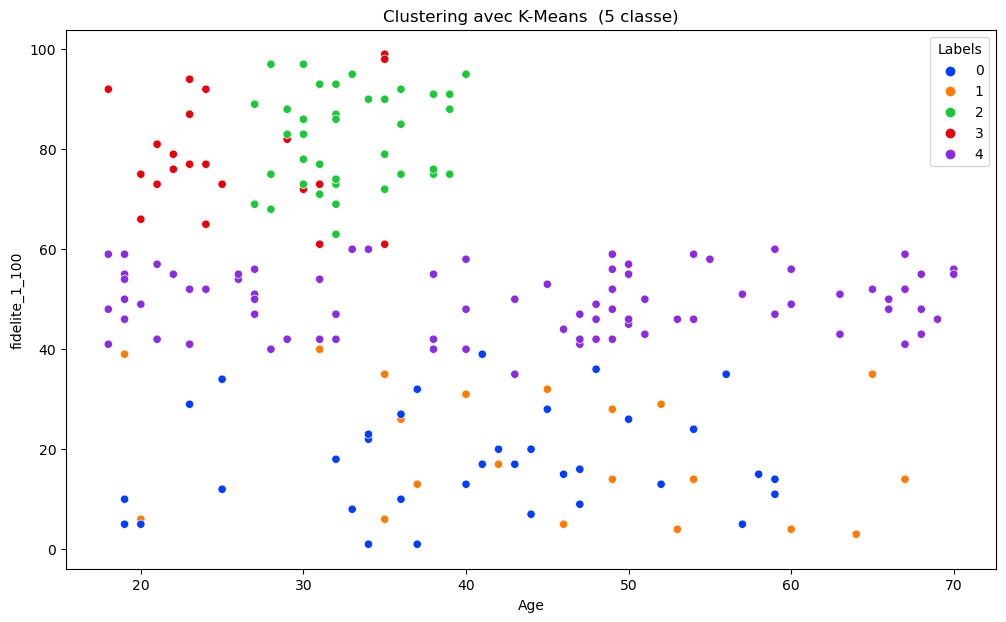

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(X['Age'], X['fidelite_1_100'], hue=X['Labels'],
                palette=sns.color_palette('bright', 5))
plt.title('Clustering avec K-Means  (5 classe)')
plt.show()

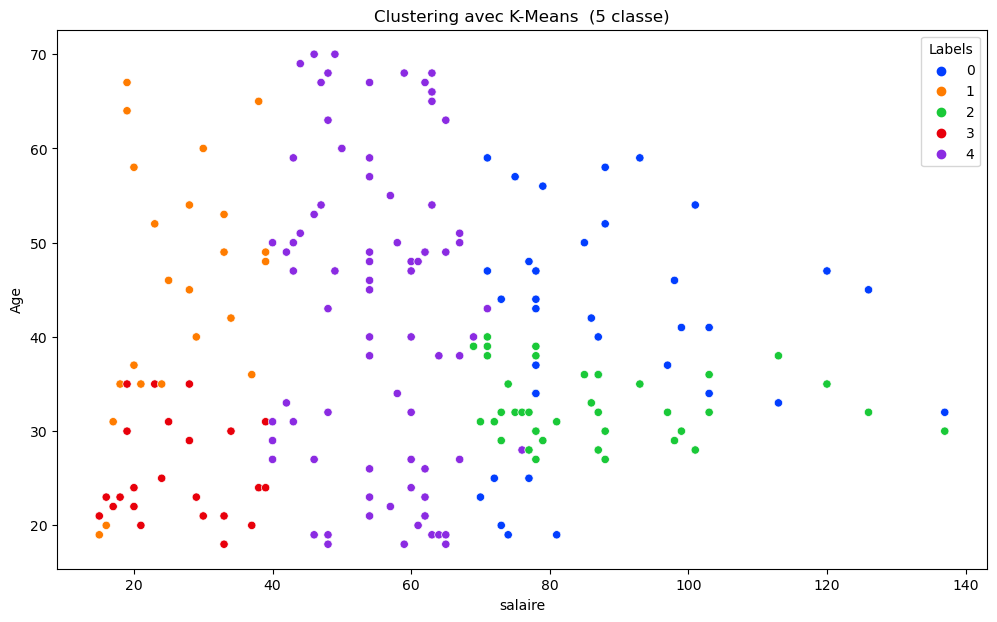

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(X['salaire'], X['Age'], hue=X['Labels'],
                palette=sns.color_palette('bright', 5))
plt.title('Clustering avec K-Means  (5 classe)')
plt.show()

# Comparer le resultat de KMeans avec d'autres algorithmes

 # HIERARCHICAL CLUSTERING

In [ ]:
H_clusters = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

In [ ]:
X['Labels_hierarch'] = H_clusters.labels_
X

,Age,salaire,fidelite_1_100,Genre_f,Genre_m,Labels,Labels_hierarch
0,19,15,39,0.0,1.0,1,4
1,21,15,81,0.0,1.0,3,3
2,20,16,6,1.0,0.0,1,4
3,23,16,77,1.0,0.0,3,3
4,31,17,40,1.0,0.0,1,4
...,...,...,...,...,...,...,...
195,35,120,79,1.0,0.0,2,0
196,45,126,28,1.0,0.0,0,1
197,32,126,74,0.0,1.0,2,0
198,32,137,18,0.0,1.0,0,1


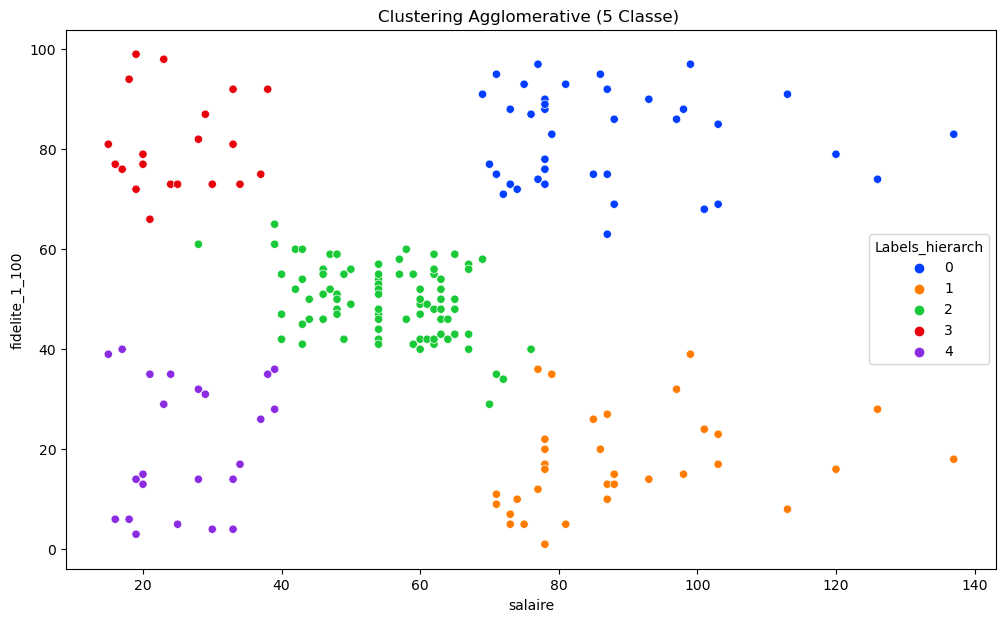

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(X['salaire'], X['fidelite_1_100'], hue=X['Labels_hierarch'], 
                palette=sns.color_palette('bright', 5))
plt.title('Clustering Agglomerative (5 Classe) ')
plt.show()

In [ ]:
dist = distance_matrix(X, X)
# print(dist)
Z = hierarchy.linkage(dist, 'complete')

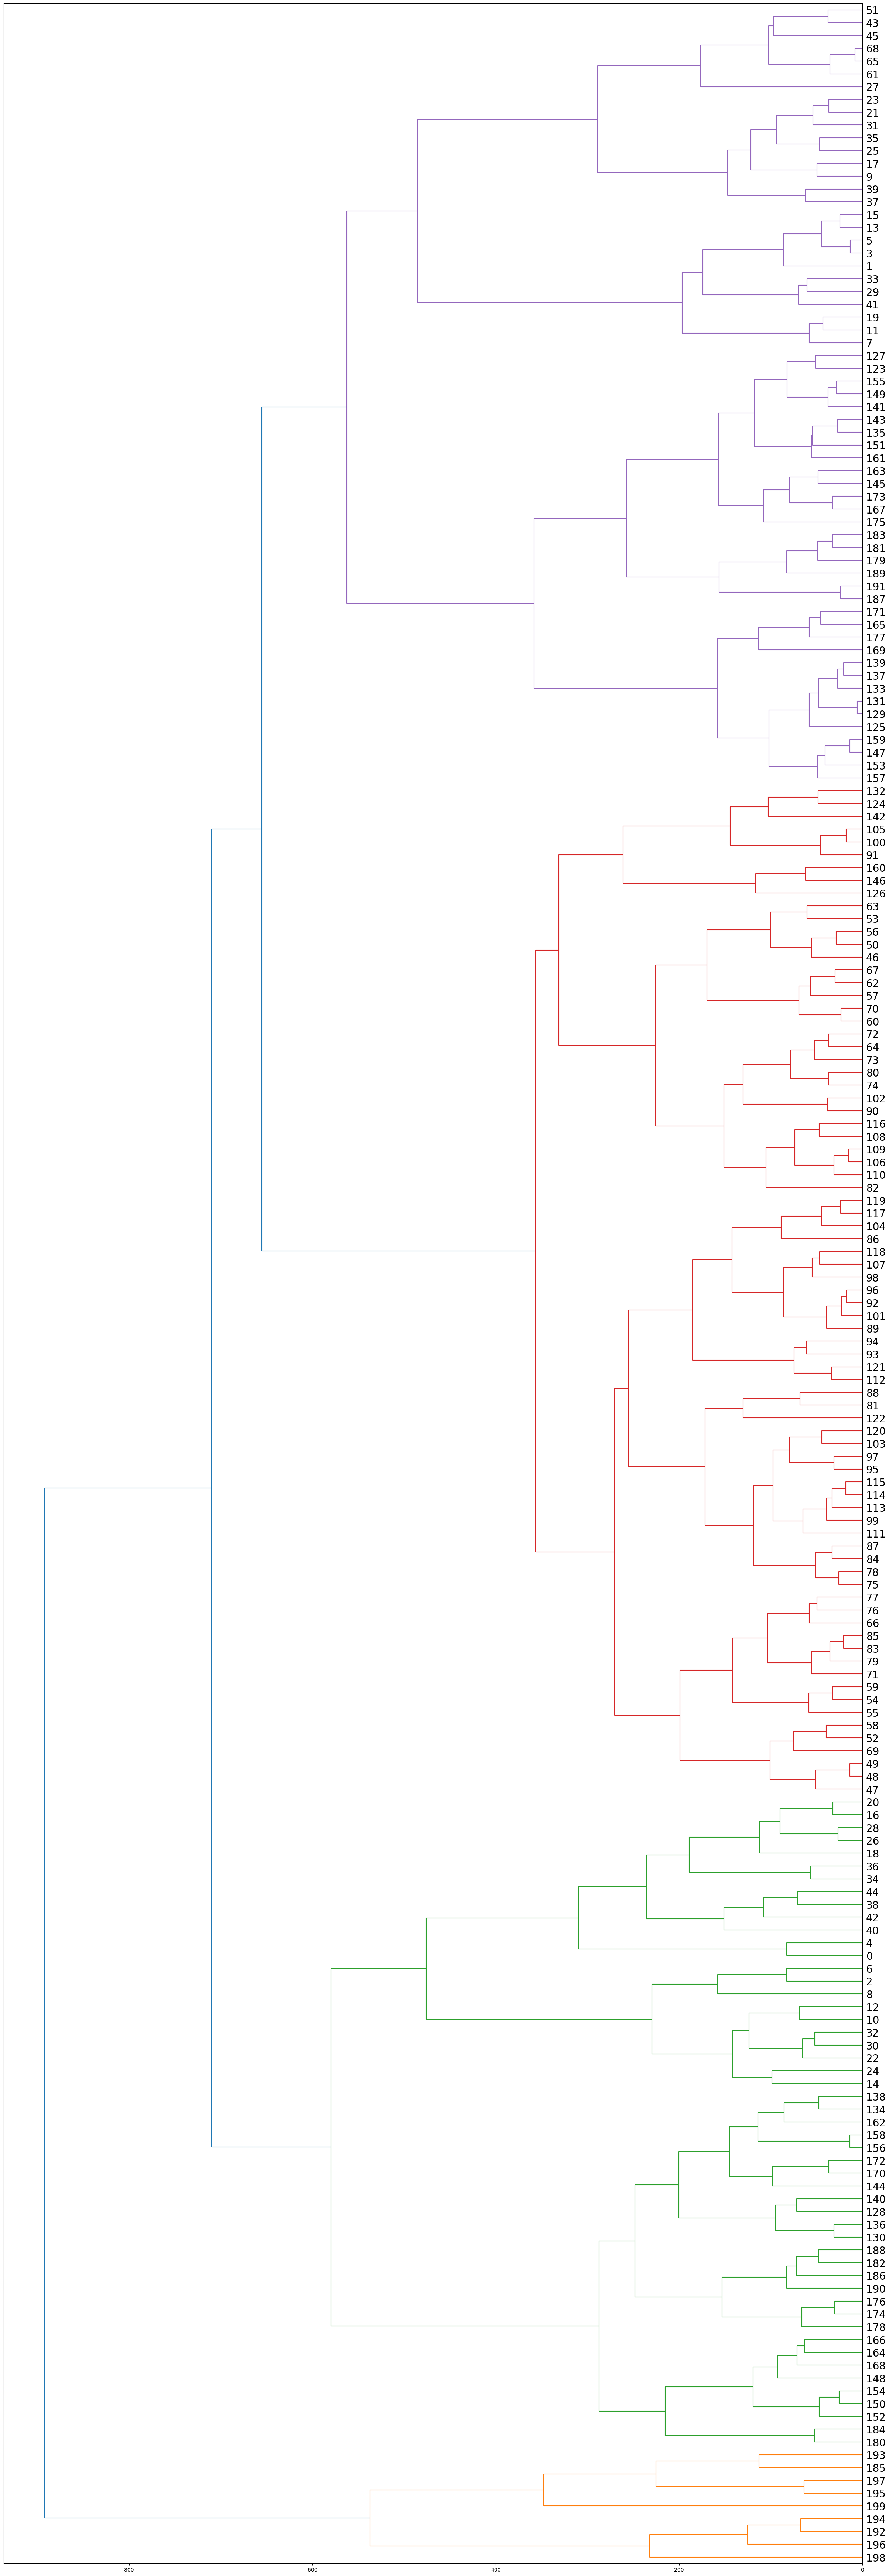

In [ ]:
plt.figure(figsize=(30, 90))
cluster_dendrograms = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=20, orientation='left')

# DB-SCAN 

In [ ]:
db_clusters = DBSCAN(eps=12, min_samples=5).fit(X)

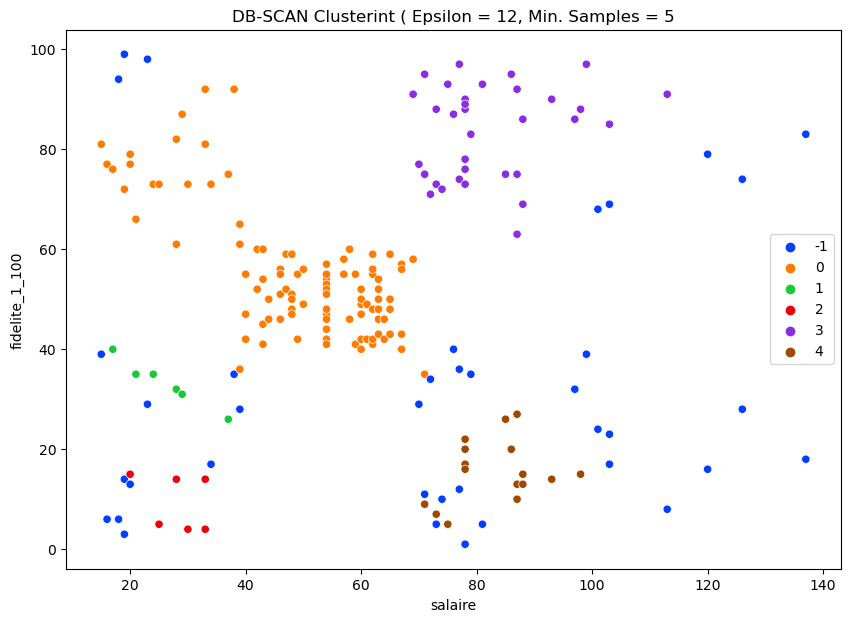

In [ ]:
X_Labels = db_clusters.labels_
plt.figure(figsize=(10, 7))
sns.scatterplot(X['salaire'], X['fidelite_1_100'], hue=X_Labels, 
                palette=sns.color_palette('bright', np.unique(db_clusters.labels_).shape[0]))
plt.title('DB-SCAN Clusterint ( Epsilon = 12, Min. Samples = 5')
plt.show()

# Fin